<a href="https://colab.research.google.com/github/Aadya-Anil/SAP-Log-anomaly-detection/blob/main/SAP_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files

# Upload the Python script and CSV log file
uploaded = files.upload()


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def preprocess_log_data(filepath):
    # Load raw logs
    df_raw = pd.read_csv(filepath, parse_dates=['Timestamp'])

    # Feature engineering
    df = df_raw.copy()
    df['hour'] = df['Timestamp'].dt.hour
    df['minute'] = df['Timestamp'].dt.minute
    df['dayofweek'] = df['Timestamp'].dt.dayofweek

    # Encode categorical features
    for col in ['LogType', 'Severity', 'Message']:
        df[col] = LabelEncoder().fit_transform(df[col])

    # Return both raw and processed data
    return df_raw, df[['hour', 'minute', 'dayofweek', 'LogType', 'Severity', 'Message']]


In [16]:
from sklearn.ensemble import IsolationForest

def detect_anomalies(df):
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(df)
    df['anomaly'] = model.predict(df)
    anomalies = df[df['anomaly'] == -1]
    return anomalies


In [17]:
import matplotlib.pyplot as plt

def plot_anomalies(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Severity'], label='Severity (encoded)', alpha=0.7)
    plt.scatter(df[df['anomaly'] == -1].index,
                df[df['anomaly'] == -1]['Severity'],
                color='red', label='Anomaly', marker='x', s=100)
    plt.legend()
    plt.title("SAP Log Severity with Detected Anomalies")
    plt.xlabel("Log Entry Index")
    plt.ylabel("Severity (encoded)")
    plt.tight_layout()
    plt.show()



🔍 Detected Anomalies (Human-readable):
            Timestamp  LogType Severity                   Message
2 2023-06-01 09:27:01  NETWORK     WARN  RFC connection timed out


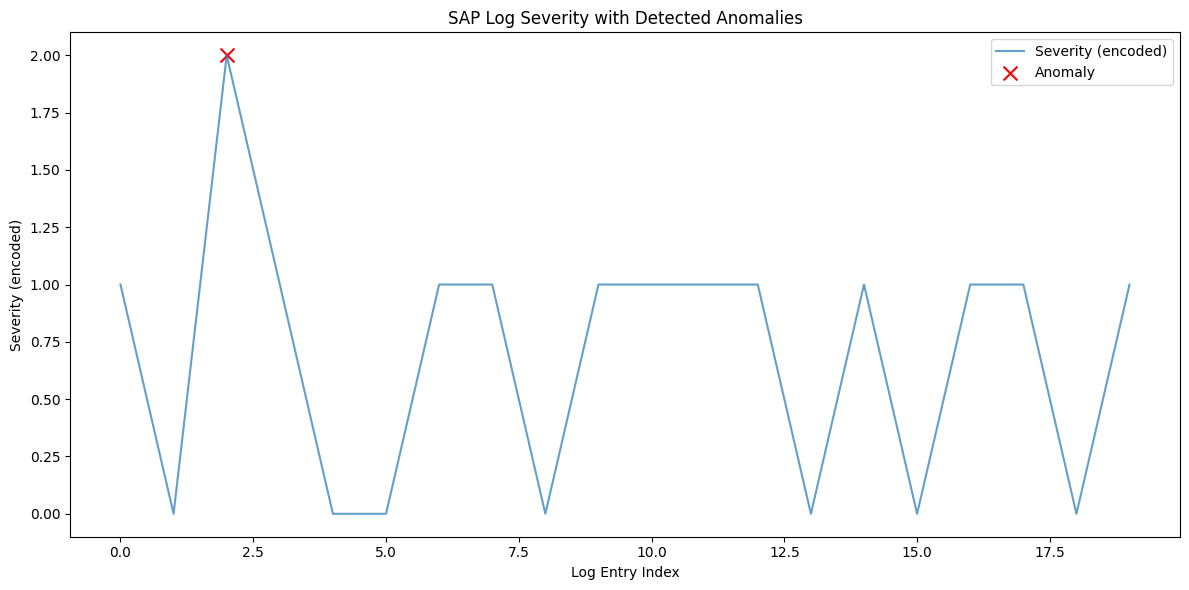

In [18]:
df_raw, df = preprocess_log_data(filename)
anomalies = detect_anomalies(df)

# Get human-readable anomalies from original logs
anomalies_raw = df_raw.loc[anomalies.index]

print("\n🔍 Detected Anomalies (Human-readable):")
print(anomalies_raw)

plot_anomalies(df)
